# Residency Program Decision Tree Simulation

This decision tree is used to choose students who will be interviewed for matching with the ENT residency program

There are six features considered:

1. Students who rotated with the program
2. URM (yes/no)
3. Preference given for program (yes/no)
4. USMLE score(s) -- this is STEP1 and STEP2
5. Medical school reputation (US News rank)
6. Research
7. Class rank
8. Letters of recommendation
9. Leadership/other exceptional characteristics

Based on a decision tree, applicants are separated into group A and group B, of which (mostly?) the top group A applicants are interviewed after being sorted based on the quality of their letters, scores, research, and intangibles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

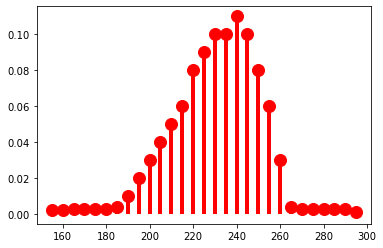

In [2]:
def sample_rotation(n):
    return np.random.binomial(1,0.05,n)

def sample_urm(n):
    return np.random.binomial(1,0.1,n)

def sample_preference(n):
    return np.random.binomial(1,0.5,n)

def sample_step_1(n):
    return np.random.binomial(1,0.95,n)

low = 155
high = 300
scores = np.arange(low,high,5)
pctl = np.array([0,0.2,0.4,0.7,1,1.3,1.6,2,3,5,8,12,17,23,31,40,50,60,71,81,89,95,98,98.4,98.7,99,99.3,99.6,99.9,100])
pr = np.array([pctl[i+1]-pctl[i] for i in range(len(pctl)-1)])
pr = pr/sum(pr)
step2_dist = stats.rv_discrete(a=0,b=300,name='step2_dist', values=(scores, pr))

fig, ax = plt.subplots(1, 1)
ax.plot(scores, step2_dist.pmf(scores), 'ro', ms=12, mec='r')
ax.vlines(scores, 0, step2_dist.pmf(scores), colors='r', lw=4)
plt.show()

def sample_step_2(n):
    return step2_dist.rvs(size=n)

def sample_reputation(n):
    return np.random.binomial(5,0.5,n)

def sample_research(n):
    return np.random.binomial(5,0.5,n)

def sample_recommendation(n):
    return np.random.binomial(5,0.5,n)

def sample_leadership(n):
    return np.random.binomial(5,0.5,n)

In [3]:
N = 100

applications = pd.DataFrame({'Rotation':sample_rotation(N), 'URM':sample_urm(N),
                             'Preference':sample_preference(N),'STEP1':sample_step_1(N), 
                             'STEP2':sample_step_2(N), 'SchoolReputation':sample_reputation(N),
                             'Research':sample_research(N), 'Recommendations':sample_recommendation(N), 
                             'Leadership':sample_leadership(N)})

applications

,Rotation,URM,Preference,STEP1,STEP2,SchoolReputation,Research,Recommendations,Leadership
0,0,0,1,1,245,2,2,1,3
1,0,0,0,1,245,5,3,2,5
2,0,0,1,1,230,1,2,2,3
3,0,0,1,1,240,4,2,3,2
4,0,0,1,1,210,3,3,1,4
...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,245,1,3,1,2
96,0,1,0,1,225,2,3,1,3
97,0,0,0,1,240,3,1,3,2
98,0,0,0,0,225,2,2,3,1


In [4]:
applications.index[applications.Rotation==1].tolist()

[29, 56, 77, 89]

In [5]:
def residency_decision_tree(applications, t_score, t_school_rank, t_class_rank, t_research, t_recommendation, t_leadership):
    group_a = []
    group_b = []
    remaining = []
    
    return group_a,group_b